# Classification
#### For Wine Quanlity Prediction
Reference : https://archive.ics.uci.edu/ml/datasets/wine


#### Author Detail 
* Name:  Omer Javed
* Email : omerjaved11@gmail.com

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [180]:
red_wine_dataset = pd.read_csv('Dataset/Wine Quality dataset/winequality-red.csv',sep = ';')
red_wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [181]:
white_wine_dataset = pd.read_csv('Dataset/Wine Quality dataset/winequality-white.csv',sep = ';')
white_wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [182]:
train = pd.concat([red_wine_dataset, white_wine_dataset])

In [183]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [184]:
print (train.info())
print (train.describe())
print (train.columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1)
memory usage: 659.9 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
m

In [185]:
print (train.nunique())
categories = train.columns
for category in categories:
    print (category)
    print(train[category].unique())

fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
dtype: int64
fixed acidity
[ 7.4   7.8  11.2   7.9   7.3   7.5   6.7   5.6   8.9   8.5   8.1   7.6
  6.9   6.3   7.1   8.3   5.2   5.7   8.8   6.8   4.6   7.7   8.7   6.4
  6.6   8.6  10.2   7.    7.2   9.3   8.    9.7   6.2   5.    4.7   8.4
 10.1   9.4   9.    8.2   6.1   5.8   9.2  11.5   5.4   9.6  12.8  11.
 11.6  12.   15.   10.8  11.1  10.   12.5  11.8  10.9  10.3  11.4   9.9
 10.4  13.3  10.6   9.8  13.4  10.7  11.9  12.4  12.2  13.8   9.1  13.5
 10.5  12.6  14.   13.7   9.5  12.7  12.3  15.6   5.3  11.3  13.    6.5
 12.9  14.3  15.5  11.7  13.2  15.9  12.1   5.1   4.9   5.9   6.    5.5
  4.8  14.2   6.15  4.5   7.15  6.45  4.2   3.8   4.4   3.9 ]


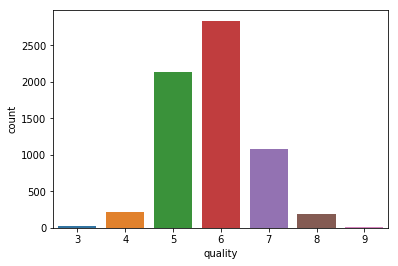

In [186]:
sns.countplot(x='quality',data=train)

In [187]:
white_wine_dataset.isnull().sum(axis = 0)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Check for relation between quanlity and other attributes

/home/omer/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


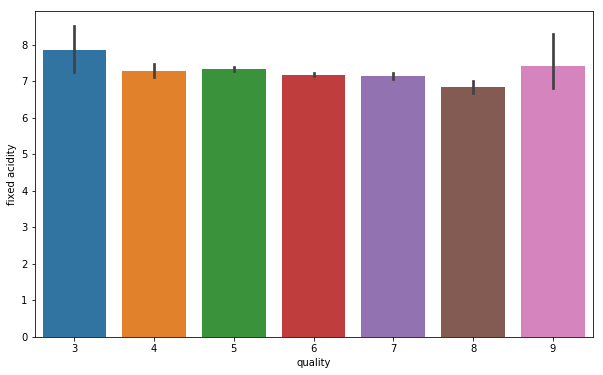

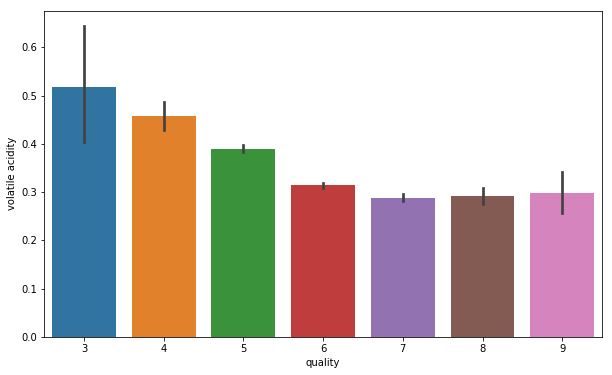

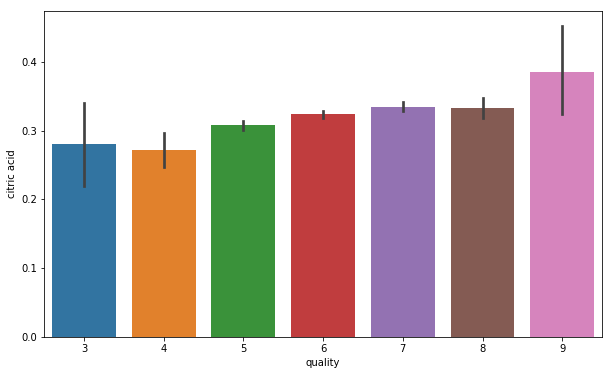

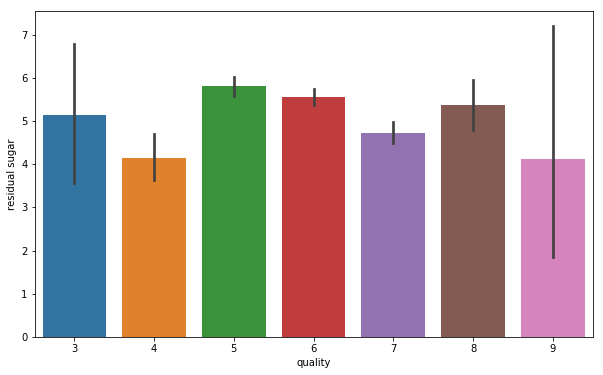

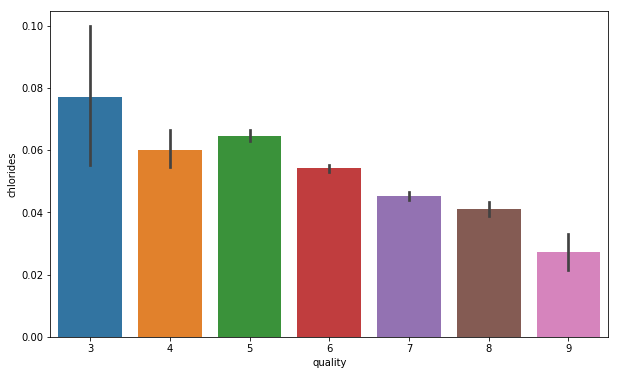

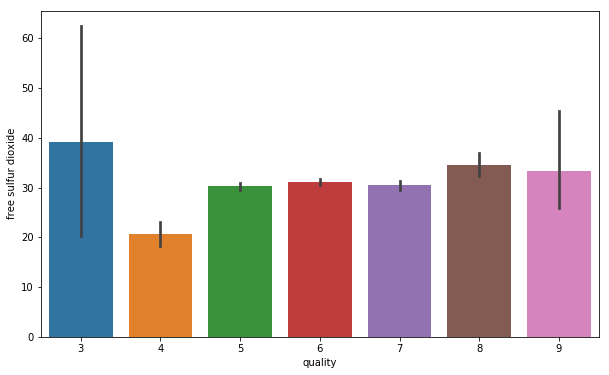

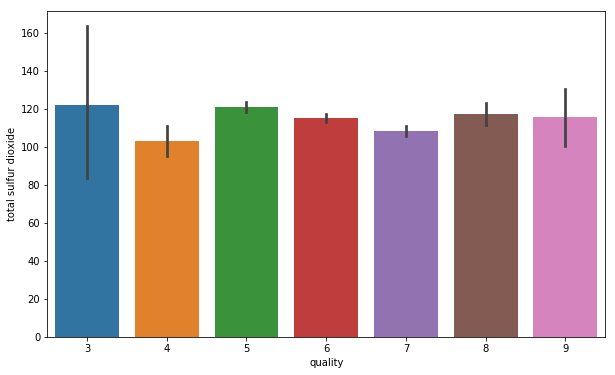

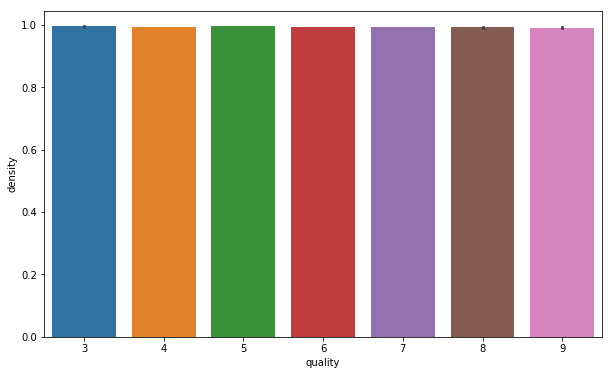

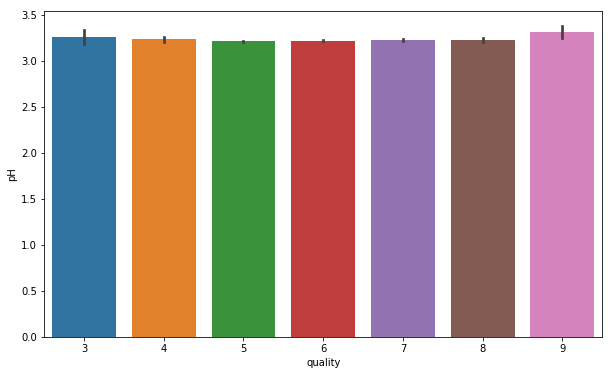

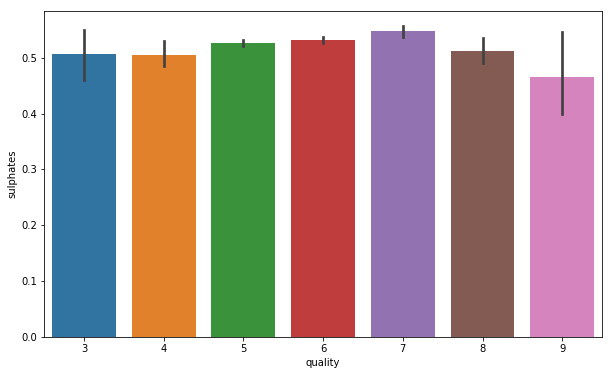

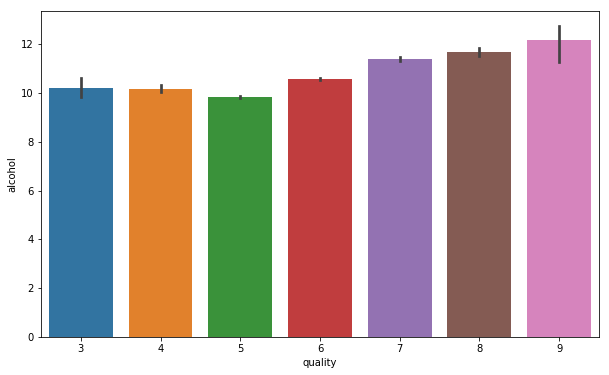

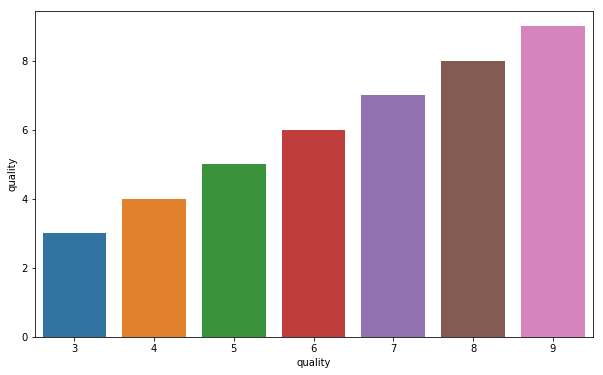

In [272]:
for column in train.columns:
    fig = plt.figure(figsize = (10,6))
    
    sns.barplot(x = 'quality', y = column, data = train )
    

* Alcohal increase Quanlity increase
* Citric Acied in crease Quality increase
* volatile  increase Quality decrease
* Cholorides increase Quanlity Decrease

In [273]:
corr = train.corr()
corr = corr.round(2)
corr.style.background_gradient()
['alcohol','chlorides','volatile acidity','citric acid']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1,0.22,0.32,-0.11,0.3,-0.28,-0.33,0.46,-0.25,0.3,-0.1,-0.08
volatile acidity,0.22,1,-0.38,-0.2,0.38,-0.35,-0.41,0.27,0.26,0.23,-0.04,-0.27
citric acid,0.32,-0.38,1,0.14,0.04,0.13,0.2,0.1,-0.33,0.06,-0.01,0.09
residual sugar,-0.11,-0.2,0.14,1,-0.13,0.4,0.5,0.55,-0.27,-0.19,-0.36,-0.04
chlorides,0.3,0.38,0.04,-0.13,1,-0.2,-0.28,0.36,0.04,0.4,-0.26,-0.2
free sulfur dioxide,-0.28,-0.35,0.13,0.4,-0.2,1,0.72,0.03,-0.15,-0.19,-0.18,0.06
total sulfur dioxide,-0.33,-0.41,0.2,0.5,-0.28,0.72,1,0.03,-0.24,-0.28,-0.27,-0.04
density,0.46,0.27,0.1,0.55,0.36,0.03,0.03,1,0.01,0.26,-0.69,-0.31
pH,-0.25,0.26,-0.33,-0.27,0.04,-0.15,-0.24,0.01,1,0.19,0.12,0.02
sulphates,0.3,0.23,0.06,-0.19,0.4,-0.19,-0.28,0.26,0.19,1,-0,0.04


In [194]:
train.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [195]:
# train = train.drop(train[train.quality == 9].index,axis=0)

In [274]:
# X  = train.drop('quality',axis=1)
X = train[['alcohol','chlorides','volatile acidity','citric acid']]
y = train.quality

In [197]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [198]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [199]:
logmodel.fit(X_train,y_train)
log_pred = logmodel.predict(X_test)

Accuracy is 0.536923076923077
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         8
          4       0.00      0.00      0.00        56
          5       0.58      0.58      0.58       650
          6       0.51      0.74      0.61       869
          7       0.52      0.09      0.15       302
          8       0.00      0.00      0.00        63
          9       0.00      0.00      0.00         2

avg / total       0.50      0.54      0.49      1950

Accuracy is 0.536923076923077


/home/omer/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


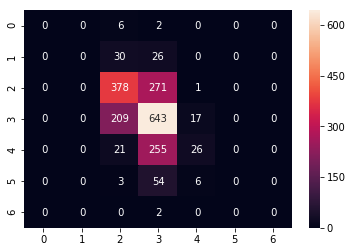

In [207]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
print("Accuracy is {}".format(accuracy_score(y_test, log_pred)))
cm = confusion_matrix(y_test, log_pred)
sns.heatmap(cm,annot=True,fmt='2.0f')
print(classification_report(y_test,log_pred))
print("Accuracy is {}".format(accuracy_score(y_test, predictions)))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1,-0.02,0.29,0.09,0.02,-0.05,0.09,0.27,-0.43,-0.02,-0.12,-0.11
volatile acidity,-0.02,1,-0.15,0.06,0.07,-0.1,0.09,0.03,-0.03,-0.04,0.07,-0.19
citric acid,0.29,-0.15,1,0.09,0.11,0.09,0.12,0.15,-0.16,0.06,-0.08,-0.01
residual sugar,0.09,0.06,0.09,1,0.09,0.3,0.4,0.84,-0.19,-0.03,-0.45,-0.1
chlorides,0.02,0.07,0.11,0.09,1,0.1,0.2,0.26,-0.09,0.02,-0.36,-0.21
free sulfur dioxide,-0.05,-0.1,0.09,0.3,0.1,1,0.62,0.29,-0,0.06,-0.25,0.01
total sulfur dioxide,0.09,0.09,0.12,0.4,0.2,0.62,1,0.53,0,0.13,-0.45,-0.17
density,0.27,0.03,0.15,0.84,0.26,0.29,0.53,1,-0.09,0.07,-0.78,-0.31
pH,-0.43,-0.03,-0.16,-0.19,-0.09,-0,0,-0.09,1,0.16,0.12,0.1
sulphates,-0.02,-0.04,0.06,-0.03,0.02,0.06,0.13,0.07,0.16,1,-0.02,0.05


# Support Vector Machines

In [208]:
from sklearn.svm import SVC # The SVM Classifier from scikit
classifier = SVC(kernel = 'rbf', random_state = 45)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=45, shrinking=True,
  tol=0.001, verbose=False)

In [209]:
svm_pred = classifier.predict(X_test)

Accuracy is 0.5471794871794872


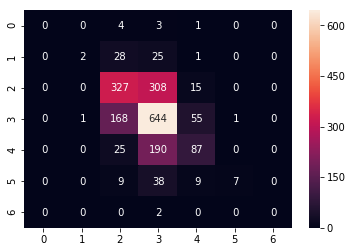

In [210]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Accuracy is {}".format(accuracy_score(y_test, svm_pred)))
cm = confusion_matrix(y_test, svm_pred)
sns.heatmap(cm,annot=True,fmt='2.0f')

In [211]:
print("Accuracy is {}".format(accuracy_score(y_test, svm_pred)))
print(classification_report(y_test,svm_pred))

Accuracy is 0.5471794871794872
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         8
          4       0.67      0.04      0.07        56
          5       0.58      0.50      0.54       650
          6       0.53      0.74      0.62       869
          7       0.52      0.29      0.37       302
          8       0.88      0.11      0.20        63
          9       0.00      0.00      0.00         2

avg / total       0.56      0.55      0.52      1950



/home/omer/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Naive Bayes 

In [212]:
from sklearn.naive_bayes import GaussianNB # The SVM Classifier from scikit
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [213]:
#Predicting the Test Set
NB_pred = classifier.predict(X_test)

Accuracy is 0.44666666666666666


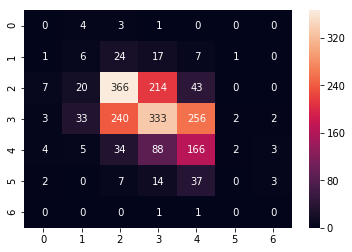

In [214]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Accuracy is {}".format(accuracy_score(y_test, NB_pred)))
cm = confusion_matrix(y_test, NB_pred)
sns.heatmap(cm,annot=True,fmt='2.0f')

In [215]:
print("Accuracy is {}".format(accuracy_score(y_test, NB_pred)))
print(classification_report(y_test,NB_pred))

Accuracy is 0.44666666666666666
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         8
          4       0.09      0.11      0.10        56
          5       0.54      0.56      0.55       650
          6       0.50      0.38      0.43       869
          7       0.33      0.55      0.41       302
          8       0.00      0.00      0.00        63
          9       0.00      0.00      0.00         2

avg / total       0.46      0.45      0.44      1950



# Decision Trees

In [216]:
from sklearn.tree import DecisionTreeClassifier
# Define the decision tree classifier
classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [217]:
# Make the prediction over the test data
DT_pred = classifier.predict(np.float32(X_test))
print("Accuracy is {}".format(accuracy_score(y_test, DT_pred)))

Accuracy is 0.518974358974359


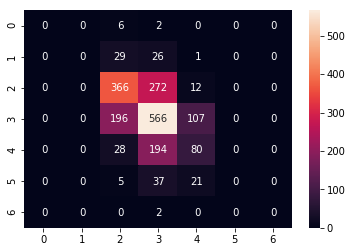

In [218]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, DT_pred)
sns.heatmap(cm,annot=True,fmt='2.0f')

In [219]:
print(classification_report(y_test,DT_pred))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         8
          4       0.00      0.00      0.00        56
          5       0.58      0.56      0.57       650
          6       0.52      0.65      0.58       869
          7       0.36      0.26      0.31       302
          8       0.00      0.00      0.00        63
          9       0.00      0.00      0.00         2

avg / total       0.48      0.52      0.49      1950



/home/omer/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Ensemble Learning - Voting Classifier

In [220]:
from sklearn.ensemble import VotingClassifier
# Declare each classifier
clf1 = SVC(random_state=22)
clf2 = DecisionTreeClassifier(random_state=23)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[
('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

In [221]:
eclf = eclf.fit(X_train, y_train)

In [222]:
# Make prediction on test data
ens_pred = eclf.predict(X_test)

/home/omer/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy is 0.5953846153846154


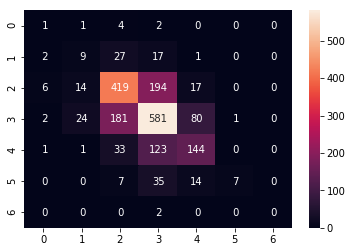

In [223]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Accuracy is {}".format(accuracy_score(y_test, ens_pred)))
cm = confusion_matrix(y_test, ens_pred)
sns.heatmap(cm,annot=True,fmt='2.0f')

In [224]:
print(classification_report(y_test,ens_pred))

             precision    recall  f1-score   support

          3       0.08      0.12      0.10         8
          4       0.18      0.16      0.17        56
          5       0.62      0.64      0.63       650
          6       0.61      0.67      0.64       869
          7       0.56      0.48      0.52       302
          8       0.88      0.11      0.20        63
          9       0.00      0.00      0.00         2

avg / total       0.60      0.60      0.59      1950



/home/omer/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Bagging

In [225]:
from sklearn.ensemble import BaggingClassifier
bag_classifier = BaggingClassifier(
        DecisionTreeClassifier(), n_estimators=500, max_samples=100,\
        bootstrap=True, n_jobs=-1)    
bag_classifier.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [226]:
bag_pred = bag_classifier.predict(X_test)

Accuracy is 0.5748717948717949


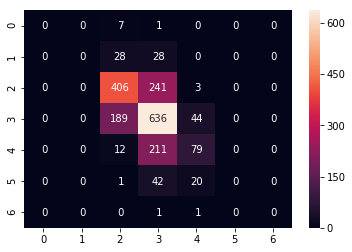

In [227]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Accuracy is {}".format(accuracy_score(y_test, bag_pred)))
cm = confusion_matrix(y_test, bag_pred)
sns.heatmap(cm,annot=True,fmt='2.0f')

In [228]:
print(classification_report(y_test,ens_pred))

             precision    recall  f1-score   support

          3       0.08      0.12      0.10         8
          4       0.18      0.16      0.17        56
          5       0.62      0.64      0.63       650
          6       0.61      0.67      0.64       869
          7       0.56      0.48      0.52       302
          8       0.88      0.11      0.20        63
          9       0.00      0.00      0.00         2

avg / total       0.60      0.60      0.59      1950



/home/omer/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [275]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [276]:
# from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
# from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
# from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.naive_bayes import MultinomialNB
# from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cross_validation import train_test_split
# from sklearn.pipeline import Pipeline

In [277]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

##### Models of Machine Learning on author ( bot , human )

##### Logistic Regression Parameters

Parameters and their values:

LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)

In [278]:
from sklearn.linear_model import LogisticRegression
LogisticRegression = LogisticRegression()
LogisticRegression.fit(X_train,y_train)
LogisticRegression_prediction = LogisticRegression.predict(X_test)
accuracy_LogisticRegression = accuracy_score(y_test,LogisticRegression_prediction)


##### Random forest  Parameters

Parameters and their values:

RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, class_weight=None)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and use averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is always the same as the original
input sample size but the samples are drawn with replacement if
`bootstrap=True` (default).

In [279]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier.fit(X_train,y_train)
RandomForestClassifier_prediction = RandomForestClassifier.predict(X_test)
accuracy_RandomForestClassifier = accuracy_score(y_test,RandomForestClassifier_prediction)


##### Linear SVC Parameters
Parameters and their values:

LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)
Docstring:     
Linear Support Vector Classification.

Similar to SVC with parameter kernel='linear', but implemented in terms of
liblinear rather than libsvm, so it has more flexibility in the choice of
penalties and loss functions and should scale better to large numbers of
samples.

In [280]:
from sklearn.svm import LinearSVC
LinearSVC = LinearSVC()
LinearSVC.fit(X_train,y_train)
LinearSVC_prediction = LinearSVC.predict(X_test)
accuracy_LinearSVC = accuracy_score(y_test,LinearSVC_prediction)


##### BernoulliNB
Parameters and their values:

BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None)

In [281]:
from sklearn.naive_bayes import BernoulliNB
BernoulliNB = BernoulliNB()
BernoulliNB.fit(X_train,y_train)
BernoulliNB_prediction = BernoulliNB.predict(X_test)
accuracy_BernoulliNB = accuracy_score(y_test,BernoulliNB_prediction)


In [282]:
from sklearn.naive_bayes import MultinomialNB
MultinomialNB = MultinomialNB()
MultinomialNB.fit(X_train,y_train)
MultinomialNB_prediction = MultinomialNB.predict(X_test)
accuracy_MultinomialNB = accuracy_score(y_test,MultinomialNB_prediction)

In [283]:
from sklearn.svm import SVC
SVC = SVC(kernel='rbf')
SVC.fit(X_train,y_train)
SVC_prediction = SVC.predict(X_test)
accuracy_SVC = accuracy_score(y_test,SVC_prediction)

## Step 6: Evaluate Machine Learning Algorithms using Test Data

#### Logistic Regression Classifier

In [289]:
X_train.head()

,alcohol,chlorides,volatile acidity,citric acid
1729,11.4,0.036,0.22,0.33
663,10.2,0.050,0.28,0.46
2586,9.0,0.062,0.18,0.30
2118,12.0,0.041,0.20,0.32
1313,9.6,0.046,0.32,0.42


## Step 7: Selection of Best Model

In [285]:
models = pd.DataFrame({'Models':
                       ['LogisticRegression',
                        'RandomForestClassifier',
                        'LinearSVC',
                        'BernoulliN','accuracy_MultinomialNB','SVC'],
                       'Accuracy':[accuracy_LogisticRegression,
                                  accuracy_RandomForestClassifier,
                                  accuracy_LinearSVC,
                                  accuracy_BernoulliNB,
                                  accuracy_MultinomialNB,
                                  accuracy_SVC]
                        })

In [286]:
print(classification_report(y_test,RandomForestClassifier_prediction))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00        13
          4       0.22      0.07      0.11        69
          5       0.63      0.70      0.66       636
          6       0.63      0.69      0.66       850
          7       0.58      0.44      0.50       327
          8       0.52      0.30      0.38        54
          9       0.00      0.00      0.00         1

avg / total       0.60      0.61      0.60      1950



/home/omer/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [287]:
print('Detail Performance of all the models')
models

Detail Performance of all the models


,Models,Accuracy
0,LogisticRegression,0.521538
1,RandomForestClassifier,0.614872
2,LinearSVC,0.518462
3,BernoulliN,0.435897
4,accuracy_MultinomialNB,0.435897
5,SVC,0.525128


In [288]:
print("Best Model")
models[models['Accuracy']== models['Accuracy'].max()]


Best Model


,Models,Accuracy
1,RandomForestClassifier,0.614872


### We can categorize quanlity

In [291]:
def map_qunality(x):
    if ( x in [3,4]):
        return "Bad"
    elif( x in [6,5]):
        return "Average"
    elif( x in [7,8,9]):
        return "Good"

In [292]:
train['Quanlity_category']=train['quality'].apply(map_qunality)

In [293]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Quanlity_category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Average
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Average
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Average
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Average
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Average


In [294]:
y = train.Quanlity_category

In [295]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [296]:
# from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
# from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
# from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.naive_bayes import MultinomialNB
# from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cross_validation import train_test_split
# from sklearn.pipeline import Pipeline

In [297]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

##### Models of Machine Learning on author ( bot , human )

##### Logistic Regression Parameters

Parameters and their values:

LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)

In [298]:
from sklearn.linear_model import LogisticRegression
LogisticRegression = LogisticRegression()
LogisticRegression.fit(X_train,y_train)
LogisticRegression_prediction = LogisticRegression.predict(X_test)
accuracy_LogisticRegression = accuracy_score(y_test,LogisticRegression_prediction)


##### Random forest  Parameters

Parameters and their values:

RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, class_weight=None)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and use averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is always the same as the original
input sample size but the samples are drawn with replacement if
`bootstrap=True` (default).

In [299]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier.fit(X_train,y_train)
RandomForestClassifier_prediction = RandomForestClassifier.predict(X_test)
accuracy_RandomForestClassifier = accuracy_score(y_test,RandomForestClassifier_prediction)


##### Linear SVC Parameters
Parameters and their values:

LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)
Docstring:     
Linear Support Vector Classification.

Similar to SVC with parameter kernel='linear', but implemented in terms of
liblinear rather than libsvm, so it has more flexibility in the choice of
penalties and loss functions and should scale better to large numbers of
samples.

In [300]:
from sklearn.svm import LinearSVC
LinearSVC = LinearSVC()
LinearSVC.fit(X_train,y_train)
LinearSVC_prediction = LinearSVC.predict(X_test)
accuracy_LinearSVC = accuracy_score(y_test,LinearSVC_prediction)


##### BernoulliNB
Parameters and their values:

BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None)

In [301]:
from sklearn.naive_bayes import BernoulliNB
BernoulliNB = BernoulliNB()
BernoulliNB.fit(X_train,y_train)
BernoulliNB_prediction = BernoulliNB.predict(X_test)
accuracy_BernoulliNB = accuracy_score(y_test,BernoulliNB_prediction)


In [302]:
from sklearn.naive_bayes import MultinomialNB
MultinomialNB = MultinomialNB()
MultinomialNB.fit(X_train,y_train)
MultinomialNB_prediction = MultinomialNB.predict(X_test)
accuracy_MultinomialNB = accuracy_score(y_test,MultinomialNB_prediction)

In [303]:
from sklearn.svm import SVC
SVC = SVC(kernel='rbf')
SVC.fit(X_train,y_train)
SVC_prediction = SVC.predict(X_test)
accuracy_SVC = accuracy_score(y_test,SVC_prediction)

## Step 6: Evaluate Machine Learning Algorithms using Test Data

#### Logistic Regression Classifier

In [304]:
X_train.head()

,alcohol,chlorides,volatile acidity,citric acid
4216,9.5,0.056,0.440,0.24
416,9.8,0.041,0.210,0.27
14,9.2,0.176,0.620,0.18
1997,8.9,0.055,0.200,0.38
223,10.0,0.083,0.645,0.25


## Step 7: Selection of Best Model

In [305]:
models = pd.DataFrame({'Models':
                       ['LogisticRegression',
                        'RandomForestClassifier',
                        'LinearSVC',
                        'BernoulliN','accuracy_MultinomialNB','SVC'],
                       'Accuracy':[accuracy_LogisticRegression,
                                  accuracy_RandomForestClassifier,
                                  accuracy_LinearSVC,
                                  accuracy_BernoulliNB,
                                  accuracy_MultinomialNB,
                                  accuracy_SVC]
                        })

In [306]:
print(classification_report(y_test,RandomForestClassifier_prediction))

             precision    recall  f1-score   support

    Average       0.84      0.94      0.89      1471
        Bad       0.30      0.05      0.08        61
       Good       0.71      0.50      0.58       418

avg / total       0.80      0.82      0.80      1950



In [307]:
print('Detail Performance of all the models')
models

Detail Performance of all the models


,Models,Accuracy
0,LogisticRegression,0.767179
1,RandomForestClassifier,0.818974
2,LinearSVC,0.767692
3,BernoulliN,0.754359
4,accuracy_MultinomialNB,0.754359
5,SVC,0.769231


In [308]:
print("Best Model")
models[models['Accuracy']== models['Accuracy'].max()]


Best Model


,Models,Accuracy
1,RandomForestClassifier,0.818974
